In [1]:
using DrWatson
quickactivate(pwd(), "LArAnalysis")
using DelimitedFiles, FHist, UnROOT, CairoMakie, Dates, Statistics

In [2]:
spe = readdlm(datadir("cal_results", "spe.txt"); comments=true)
pes_keVee = readdlm(datadir("cal_results", "cal_co.txt"); comments=true);

kr_energy = 41.55 # keV at peak
co_energy = 122.0;

## Spectra

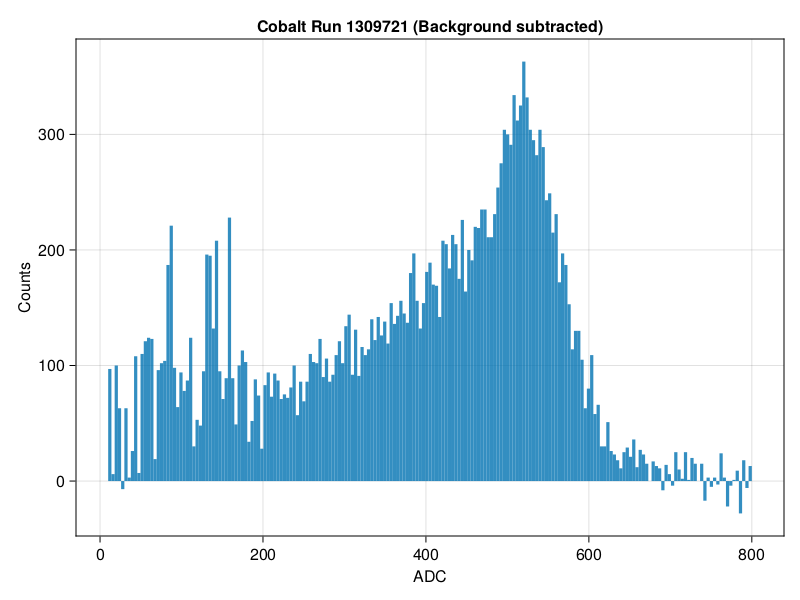

In [63]:
f = datadir("exp_pro", "Cobalt_1309721.root")
rf = ROOTFile(f)
t = LazyTree(rf, "SimOut", ["adc1", "adc3", "timestamp", "runno"])

run = t.runno[1]
timestamp = t.timestamp[1]

bkg_fl = readdir(datadir("exp_pro"); join=true)
bkg_fl = filter(x -> occursin("Bkg", x), bkg_fl)
bkg_rn = parse.(Int, (map(x -> x.match, match.(r"[0-9]+", bkg_fl))))
Δrun = abs.(bkg_rn .- run)
close_bkg = bkg_fl[argmin(Δrun)]
bkg_f = ROOTFile(close_bkg)
bkgt = LazyTree(bkg_f, "SimOut", ["adc1", "adc3", "timestamp"])

timestamp_bkg = bkgt.timestamp[1]

adc1 = t.adc1 |> collect
replace!(x -> x > 1e6 ? 0.0 : x, adc1) # replace bad samples
adc3 = t.adc3 |> collect
replace!(x -> x > 1e6 ? 0.0 : x, adc3) # replace bad samples
adc_bkg1 = bkgt.adc1 |> collect
replace!(x -> x > 1e6 ? 0.0 : x, adc_bkg1) # replace bad samples
adc_bkg3 = bkgt.adc3 |> collect
replace!(x -> x > 1e6 ? 0.0 : x, adc_bkg3) # replace bad samples

spe = readdlm(datadir("cal_results", "spe.txt"); comments=true)
speco_i = argmin(abs.(spe[:, 1] .- timestamp))
spebkg_i = argmin(abs.(spe[:, 1] .- timestamp_bkg))
speco1, speco3 = spe[speco_i, 2:3]
spebkg1, spebkg3 = spe[spebkg_i, 2:3]

# Run times for scaling
co_time = t.timestamp[end] - t.timestamp[1]
bkg_time = bkgt.timestamp[end] - bkgt.timestamp[1]

bins = range(10, 800, length=200)
npe_co = adc1 ./ speco1 .+ adc3 ./ speco3 |> filter(isfinite)
npe_bkg = adc_bkg1 ./ spebkg1 .+ adc_bkg3 ./ spebkg3 |> filter(isfinite)
co_hist = Hist1D(npe_co, bins)
bkg_hist = Hist1D(npe_bkg, bins)
data = co_hist - bkg_hist * (co_time / bkg_time)
fig = Figure()
ax = Axis(fig[1, 1], title="Cobalt Run $run (Background subtracted)", xlabel="ADC", ylabel="Counts")
hist!(data)
fig

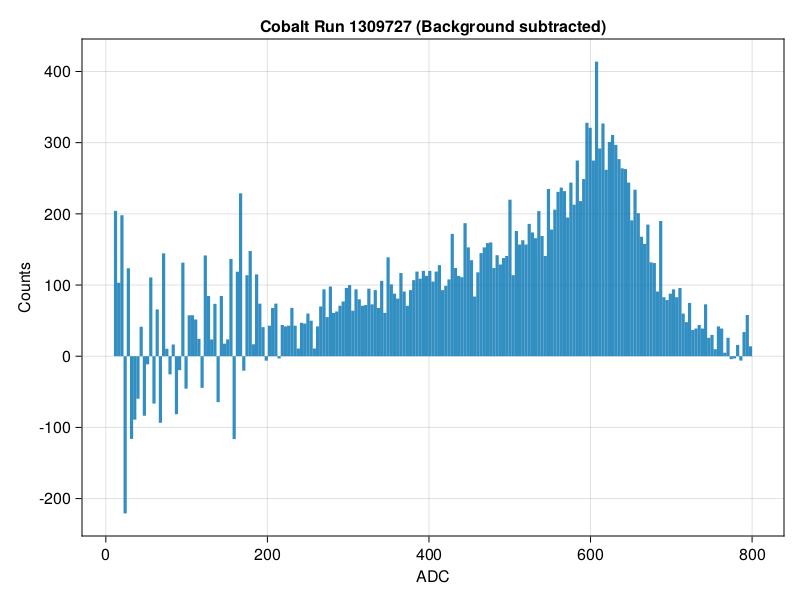

In [64]:
f = datadir("exp_pro", "Cobalt_1309727.root")
rf = ROOTFile(f)
t = LazyTree(rf, "SimOut", ["adc1", "adc3", "timestamp", "runno"])

run = t.runno[1]
timestamp = t.timestamp[1]

bkg_fl = readdir(datadir("exp_pro"); join=true)
bkg_fl = filter(x -> occursin("Bkg", x), bkg_fl)
bkg_rn = parse.(Int, (map(x -> x.match, match.(r"[0-9]+", bkg_fl))))
Δrun = abs.(bkg_rn .- run)
close_bkg = bkg_fl[argmin(Δrun)]
bkg_f = ROOTFile(close_bkg)
bkgt = LazyTree(bkg_f, "SimOut", ["adc1", "adc3", "timestamp"])

timestamp_bkg = bkgt.timestamp[1]

adc1 = t.adc1 |> collect
replace!(x -> x > 1e6 ? 0.0 : x, adc1) # replace bad samples
adc3 = t.adc3 |> collect
replace!(x -> x > 1e6 ? 0.0 : x, adc3) # replace bad samples
adc_bkg1 = bkgt.adc1 |> collect
replace!(x -> x > 1e6 ? 0.0 : x, adc_bkg1) # replace bad samples
adc_bkg3 = bkgt.adc3 |> collect
replace!(x -> x > 1e6 ? 0.0 : x, adc_bkg3) # replace bad samples

spe = readdlm(datadir("cal_results", "spe.txt"); comments=true)
speco_i = argmin(abs.(spe[:, 1] .- timestamp))
spebkg_i = argmin(abs.(spe[:, 1] .- timestamp_bkg))
speco1, speco3 = spe[speco_i, 2:3]
spebkg1, spebkg3 = spe[spebkg_i, 2:3]

# Run times for scaling
co_time = t.timestamp[end] - t.timestamp[1]
bkg_time = bkgt.timestamp[end] - bkgt.timestamp[1]

bins = range(10, 800, length=200)
npe_co = adc1 ./ speco1 .+ adc3 ./ speco3 |> filter(isfinite)
npe_bkg = adc_bkg1 ./ spebkg1 .+ adc_bkg3 ./ spebkg3 |> filter(isfinite)
co_hist = Hist1D(npe_co, bins)
bkg_hist = Hist1D(npe_bkg, bins)
data = co_hist - bkg_hist * (co_time / bkg_time)
fig = Figure()
ax = Axis(fig[1, 1], title="Cobalt Run $run (Background subtracted)", xlabel="ADC", ylabel="Counts")
hist!(data)
fig

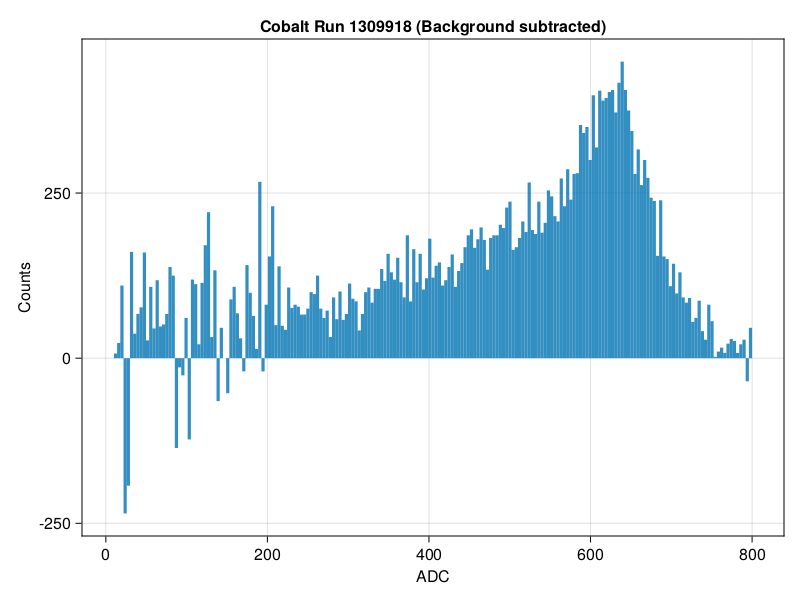

In [65]:
f = datadir("exp_pro", "Cobalt_1309918.root")
rf = ROOTFile(f)
t = LazyTree(rf, "SimOut", ["adc1", "adc3", "timestamp", "runno"])

run = t.runno[1]
timestamp = t.timestamp[1]

bkg_fl = readdir(datadir("exp_pro"); join=true)
bkg_fl = filter(x -> occursin("Bkg", x), bkg_fl)
bkg_rn = parse.(Int, (map(x -> x.match, match.(r"[0-9]+", bkg_fl))))
Δrun = abs.(bkg_rn .- run)
close_bkg = bkg_fl[argmin(Δrun)]
bkg_f = ROOTFile(close_bkg)
bkgt = LazyTree(bkg_f, "SimOut", ["adc1", "adc3", "timestamp"])

timestamp_bkg = bkgt.timestamp[1]

adc1 = t.adc1 |> collect
replace!(x -> x > 1e6 ? 0.0 : x, adc1) # replace bad samples
adc3 = t.adc3 |> collect
replace!(x -> x > 1e6 ? 0.0 : x, adc3) # replace bad samples
adc_bkg1 = bkgt.adc1 |> collect
replace!(x -> x > 1e6 ? 0.0 : x, adc_bkg1) # replace bad samples
adc_bkg3 = bkgt.adc3 |> collect
replace!(x -> x > 1e6 ? 0.0 : x, adc_bkg3) # replace bad samples

spe = readdlm(datadir("cal_results", "spe.txt"); comments=true)
speco_i = argmin(abs.(spe[:, 1] .- timestamp))
spebkg_i = argmin(abs.(spe[:, 1] .- timestamp_bkg))
speco1, speco3 = spe[speco_i, 2:3]
spebkg1, spebkg3 = spe[spebkg_i, 2:3]

# Run times for scaling
co_time = t.timestamp[end] - t.timestamp[1]
bkg_time = bkgt.timestamp[end] - bkgt.timestamp[1]

bins = range(10, 800, length=200)
npe_co = adc1 ./ speco1 .+ adc3 ./ speco3 |> filter(isfinite)
npe_bkg = adc_bkg1 ./ spebkg1 .+ adc_bkg3 ./ spebkg3 |> filter(isfinite)
co_hist = Hist1D(npe_co, bins)
bkg_hist = Hist1D(npe_bkg, bins)
data = co_hist - bkg_hist * (co_time / bkg_time)
fig = Figure()
ax = Axis(fig[1, 1], title="Cobalt Run $run (Background subtracted)", xlabel="ADC", ylabel="Counts")
hist!(data)
fig

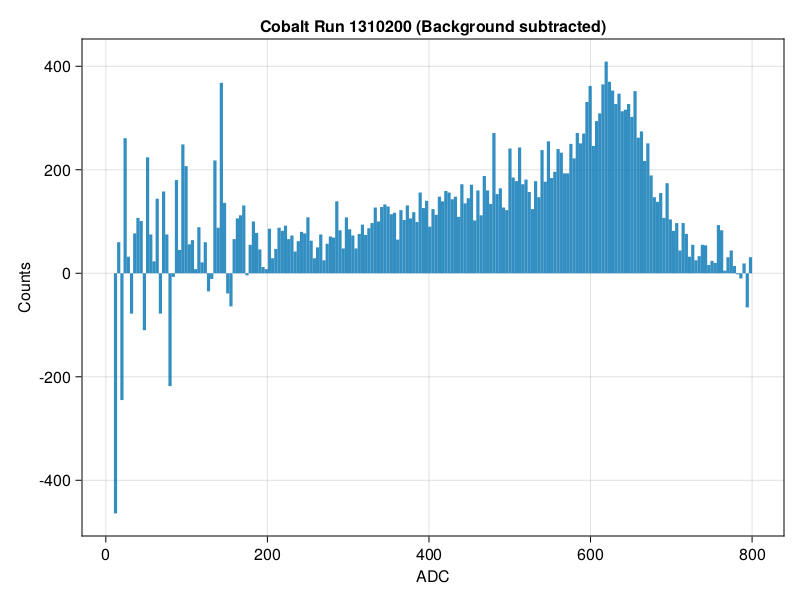

In [66]:
f = datadir("exp_pro", "Cobalt_1310200.root")
rf = ROOTFile(f)
t = LazyTree(rf, "SimOut", ["adc1", "adc3", "timestamp", "runno"])

run = t.runno[1]
timestamp = t.timestamp[1]

bkg_fl = readdir(datadir("exp_pro"); join=true)
bkg_fl = filter(x -> occursin("Bkg", x), bkg_fl)
bkg_rn = parse.(Int, (map(x -> x.match, match.(r"[0-9]+", bkg_fl))))
Δrun = abs.(bkg_rn .- run)
close_bkg = bkg_fl[argmin(Δrun)]
bkg_f = ROOTFile(close_bkg)
bkgt = LazyTree(bkg_f, "SimOut", ["adc1", "adc3", "timestamp"])

timestamp_bkg = bkgt.timestamp[1]

adc1 = t.adc1 |> collect
replace!(x -> x > 1e6 ? 0.0 : x, adc1) # replace bad samples
adc3 = t.adc3 |> collect
replace!(x -> x > 1e6 ? 0.0 : x, adc3) # replace bad samples
adc_bkg1 = bkgt.adc1 |> collect
replace!(x -> x > 1e6 ? 0.0 : x, adc_bkg1) # replace bad samples
adc_bkg3 = bkgt.adc3 |> collect
replace!(x -> x > 1e6 ? 0.0 : x, adc_bkg3) # replace bad samples

spe = readdlm(datadir("cal_results", "spe.txt"); comments=true)
speco_i = argmin(abs.(spe[:, 1] .- timestamp))
spebkg_i = argmin(abs.(spe[:, 1] .- timestamp_bkg))
speco1, speco3 = spe[speco_i, 2:3]
spebkg1, spebkg3 = spe[spebkg_i, 2:3]

# Run times for scaling
co_time = t.timestamp[end] - t.timestamp[1]
bkg_time = bkgt.timestamp[end] - bkgt.timestamp[1]

bins = range(10, 800, length=200)
npe_co = adc1 ./ speco1 .+ adc3 ./ speco3 |> filter(isfinite)
npe_bkg = adc_bkg1 ./ spebkg1 .+ adc_bkg3 ./ spebkg3 |> filter(isfinite)
co_hist = Hist1D(npe_co, bins)
bkg_hist = Hist1D(npe_bkg, bins)
data = co_hist - bkg_hist * (co_time / bkg_time)
fig = Figure()
ax = Axis(fig[1, 1], title="Cobalt Run $run (Background subtracted)", xlabel="ADC", ylabel="Counts")
hist!(data)
fig

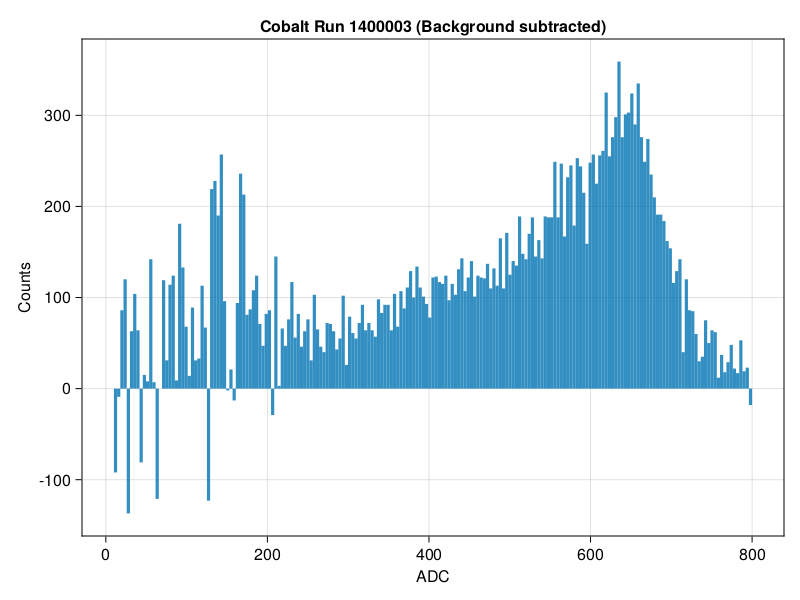

In [67]:
f = datadir("exp_pro", "Cobalt_1400003.root")
rf = ROOTFile(f)
t = LazyTree(rf, "SimOut", ["adc1", "adc3", "timestamp", "runno"])

run = t.runno[1]
timestamp = t.timestamp[1]

bkg_fl = readdir(datadir("exp_pro"); join=true)
bkg_fl = filter(x -> occursin("Bkg", x), bkg_fl)
bkg_rn = parse.(Int, (map(x -> x.match, match.(r"[0-9]+", bkg_fl))))
Δrun = abs.(bkg_rn .- run)
close_bkg = bkg_fl[argmin(Δrun)]
bkg_f = ROOTFile(close_bkg)
bkgt = LazyTree(bkg_f, "SimOut", ["adc1", "adc3", "timestamp"])

timestamp_bkg = bkgt.timestamp[1]

adc1 = t.adc1 |> collect
replace!(x -> x > 1e6 ? 0.0 : x, adc1) # replace bad samples
adc3 = t.adc3 |> collect
replace!(x -> x > 1e6 ? 0.0 : x, adc3) # replace bad samples
adc_bkg1 = bkgt.adc1 |> collect
replace!(x -> x > 1e6 ? 0.0 : x, adc_bkg1) # replace bad samples
adc_bkg3 = bkgt.adc3 |> collect
replace!(x -> x > 1e6 ? 0.0 : x, adc_bkg3) # replace bad samples

spe = readdlm(datadir("cal_results", "spe.txt"); comments=true)
speco_i = argmin(abs.(spe[:, 1] .- timestamp))
spebkg_i = argmin(abs.(spe[:, 1] .- timestamp_bkg))
speco1, speco3 = spe[speco_i, 2:3]
spebkg1, spebkg3 = spe[spebkg_i, 2:3]

# Run times for scaling
co_time = t.timestamp[end] - t.timestamp[1]
bkg_time = bkgt.timestamp[end] - bkgt.timestamp[1]

bins = range(10, 800, length=200)
npe_co = adc1 ./ speco1 .+ adc3 ./ speco3 |> filter(isfinite)
npe_bkg = adc_bkg1 ./ spebkg1 .+ adc_bkg3 ./ spebkg3 |> filter(isfinite)
co_hist = Hist1D(npe_co, bins)
bkg_hist = Hist1D(npe_bkg, bins)
data = co_hist - bkg_hist * (co_time / bkg_time)
fig = Figure()
ax = Axis(fig[1, 1], title="Cobalt Run $run (Background subtracted)", xlabel="ADC", ylabel="Counts")
hist!(data)
fig

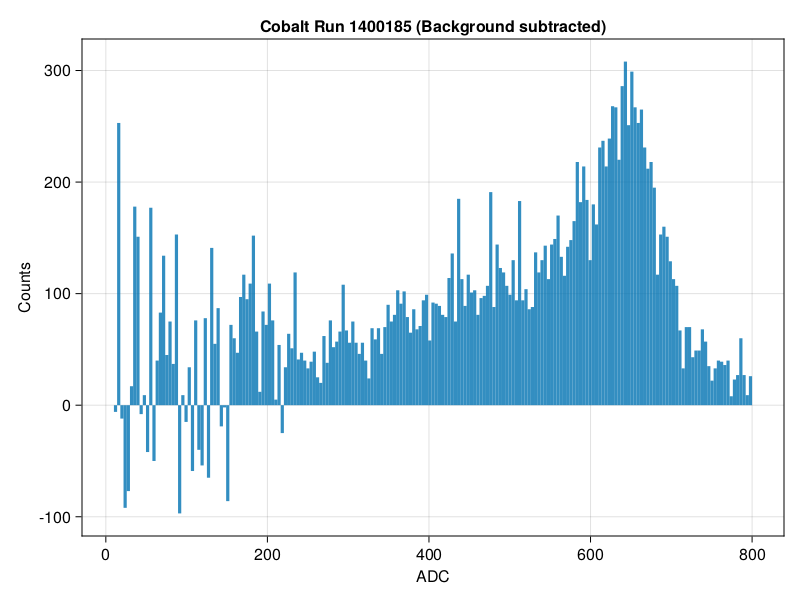

In [68]:
f = datadir("exp_pro", "Cobalt_1400185.root")
rf = ROOTFile(f)
t = LazyTree(rf, "SimOut", ["adc1", "adc3", "timestamp", "runno"])

run = t.runno[1]
timestamp = t.timestamp[1]

bkg_fl = readdir(datadir("exp_pro"); join=true)
bkg_fl = filter(x -> occursin("Bkg", x), bkg_fl)
bkg_rn = parse.(Int, (map(x -> x.match, match.(r"[0-9]+", bkg_fl))))
Δrun = abs.(bkg_rn .- run)
close_bkg = bkg_fl[argmin(Δrun)]
bkg_f = ROOTFile(close_bkg)
bkgt = LazyTree(bkg_f, "SimOut", ["adc1", "adc3", "timestamp"])

timestamp_bkg = bkgt.timestamp[1]

adc1 = t.adc1 |> collect
replace!(x -> x > 1e6 ? 0.0 : x, adc1) # replace bad samples
adc3 = t.adc3 |> collect
replace!(x -> x > 1e6 ? 0.0 : x, adc3) # replace bad samples
adc_bkg1 = bkgt.adc1 |> collect
replace!(x -> x > 1e6 ? 0.0 : x, adc_bkg1) # replace bad samples
adc_bkg3 = bkgt.adc3 |> collect
replace!(x -> x > 1e6 ? 0.0 : x, adc_bkg3) # replace bad samples

spe = readdlm(datadir("cal_results", "spe.txt"); comments=true)
speco_i = argmin(abs.(spe[:, 1] .- timestamp))
spebkg_i = argmin(abs.(spe[:, 1] .- timestamp_bkg))
speco1, speco3 = spe[speco_i, 2:3]
spebkg1, spebkg3 = spe[spebkg_i, 2:3]

# Run times for scaling
co_time = t.timestamp[end] - t.timestamp[1]
bkg_time = bkgt.timestamp[end] - bkgt.timestamp[1]

bins = range(10, 800, length=200)
npe_co = adc1 ./ speco1 .+ adc3 ./ speco3 |> filter(isfinite)
npe_bkg = adc_bkg1 ./ spebkg1 .+ adc_bkg3 ./ spebkg3 |> filter(isfinite)
co_hist = Hist1D(npe_co, bins)
bkg_hist = Hist1D(npe_bkg, bins)
data = co_hist - bkg_hist * (co_time / bkg_time)
fig = Figure()
ax = Axis(fig[1, 1], title="Cobalt Run $run (Background subtracted)", xlabel="ADC", ylabel="Counts")
hist!(data)
fig

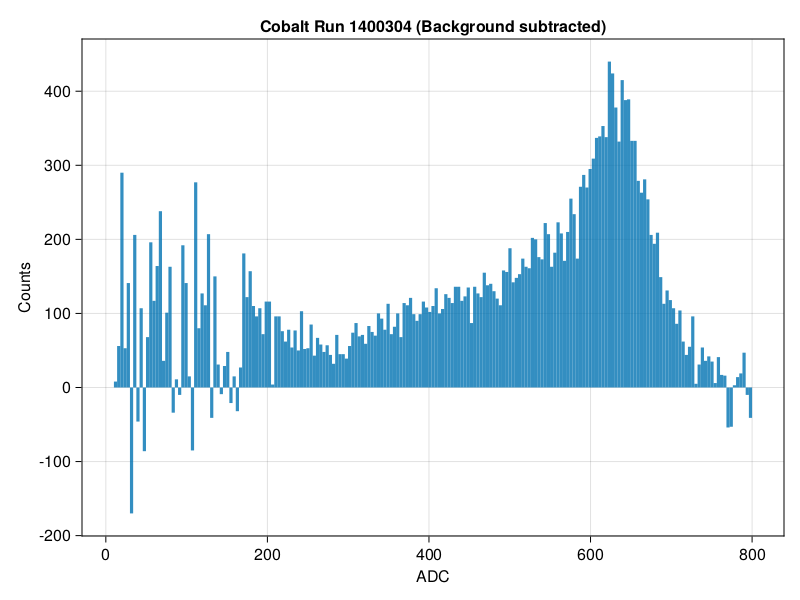

In [69]:
f = datadir("exp_pro", "Cobalt_1400304.root")
rf = ROOTFile(f)
t = LazyTree(rf, "SimOut", ["adc1", "adc3", "timestamp", "runno"])

run = t.runno[1]
timestamp = t.timestamp[1]

bkg_fl = readdir(datadir("exp_pro"); join=true)
bkg_fl = filter(x -> occursin("Bkg", x), bkg_fl)
bkg_rn = parse.(Int, (map(x -> x.match, match.(r"[0-9]+", bkg_fl))))
Δrun = abs.(bkg_rn .- run)
close_bkg = bkg_fl[argmin(Δrun)]
bkg_f = ROOTFile(close_bkg)
bkgt = LazyTree(bkg_f, "SimOut", ["adc1", "adc3", "timestamp"])

timestamp_bkg = bkgt.timestamp[1]

adc1 = t.adc1 |> collect
replace!(x -> x > 1e6 ? 0.0 : x, adc1) # replace bad samples
adc3 = t.adc3 |> collect
replace!(x -> x > 1e6 ? 0.0 : x, adc3) # replace bad samples
adc_bkg1 = bkgt.adc1 |> collect
replace!(x -> x > 1e6 ? 0.0 : x, adc_bkg1) # replace bad samples
adc_bkg3 = bkgt.adc3 |> collect
replace!(x -> x > 1e6 ? 0.0 : x, adc_bkg3) # replace bad samples

spe = readdlm(datadir("cal_results", "spe.txt"); comments=true)
speco_i = argmin(abs.(spe[:, 1] .- timestamp))
spebkg_i = argmin(abs.(spe[:, 1] .- timestamp_bkg))
speco1, speco3 = spe[speco_i, 2:3]
spebkg1, spebkg3 = spe[spebkg_i, 2:3]

# Run times for scaling
co_time = t.timestamp[end] - t.timestamp[1]
bkg_time = bkgt.timestamp[end] - bkgt.timestamp[1]

bins = range(10, 800, length=200)
npe_co = adc1 ./ speco1 .+ adc3 ./ speco3 |> filter(isfinite)
npe_bkg = adc_bkg1 ./ spebkg1 .+ adc_bkg3 ./ spebkg3 |> filter(isfinite)
co_hist = Hist1D(npe_co, bins)
bkg_hist = Hist1D(npe_bkg, bins)
data = co_hist - bkg_hist * (co_time / bkg_time)
fig = Figure()
ax = Axis(fig[1, 1], title="Cobalt Run $run (Background subtracted)", xlabel="ADC", ylabel="Counts")
hist!(data)
fig

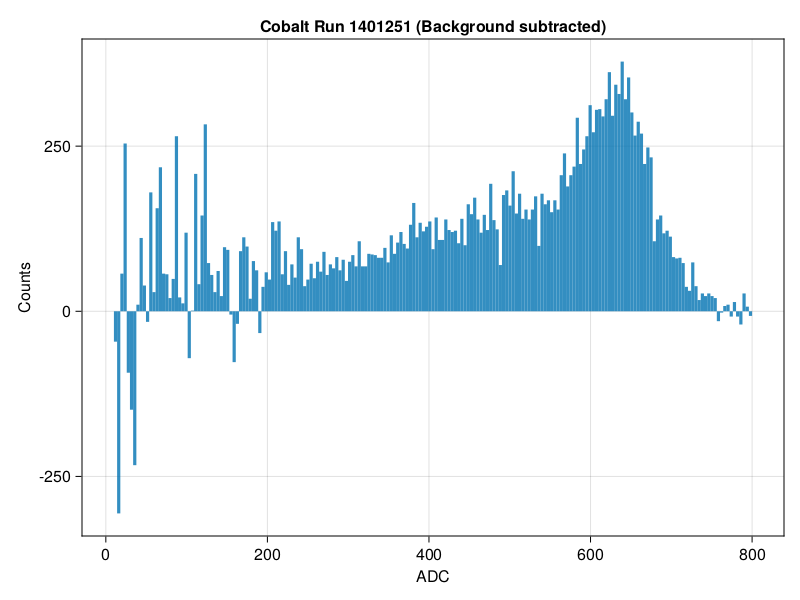

In [70]:
f = datadir("exp_pro", "Cobalt_1401251.root")
rf = ROOTFile(f)
t = LazyTree(rf, "SimOut", ["adc1", "adc3", "timestamp", "runno"])

run = t.runno[1]
timestamp = t.timestamp[1]

bkg_fl = readdir(datadir("exp_pro"); join=true)
bkg_fl = filter(x -> occursin("Bkg", x), bkg_fl)
bkg_rn = parse.(Int, (map(x -> x.match, match.(r"[0-9]+", bkg_fl))))
Δrun = abs.(bkg_rn .- run)
close_bkg = bkg_fl[argmin(Δrun)]
bkg_f = ROOTFile(close_bkg)
bkgt = LazyTree(bkg_f, "SimOut", ["adc1", "adc3", "timestamp"])

timestamp_bkg = bkgt.timestamp[1]

adc1 = t.adc1 |> collect
replace!(x -> x > 1e6 ? 0.0 : x, adc1) # replace bad samples
adc3 = t.adc3 |> collect
replace!(x -> x > 1e6 ? 0.0 : x, adc3) # replace bad samples
adc_bkg1 = bkgt.adc1 |> collect
replace!(x -> x > 1e6 ? 0.0 : x, adc_bkg1) # replace bad samples
adc_bkg3 = bkgt.adc3 |> collect
replace!(x -> x > 1e6 ? 0.0 : x, adc_bkg3) # replace bad samples

spe = readdlm(datadir("cal_results", "spe.txt"); comments=true)
speco_i = argmin(abs.(spe[:, 1] .- timestamp))
spebkg_i = argmin(abs.(spe[:, 1] .- timestamp_bkg))
speco1, speco3 = spe[speco_i, 2:3]
spebkg1, spebkg3 = spe[spebkg_i, 2:3]

# Run times for scaling
co_time = t.timestamp[end] - t.timestamp[1]
bkg_time = bkgt.timestamp[end] - bkgt.timestamp[1]

bins = range(10, 800, length=200)
npe_co = adc1 ./ speco1 .+ adc3 ./ speco3 |> filter(isfinite)
npe_bkg = adc_bkg1 ./ spebkg1 .+ adc_bkg3 ./ spebkg3 |> filter(isfinite)
co_hist = Hist1D(npe_co, bins)
bkg_hist = Hist1D(npe_bkg, bins)
data = co_hist - bkg_hist * (co_time / bkg_time)
fig = Figure()
ax = Axis(fig[1, 1], title="Cobalt Run $run (Background subtracted)", xlabel="ADC", ylabel="Counts")
hist!(data)
fig

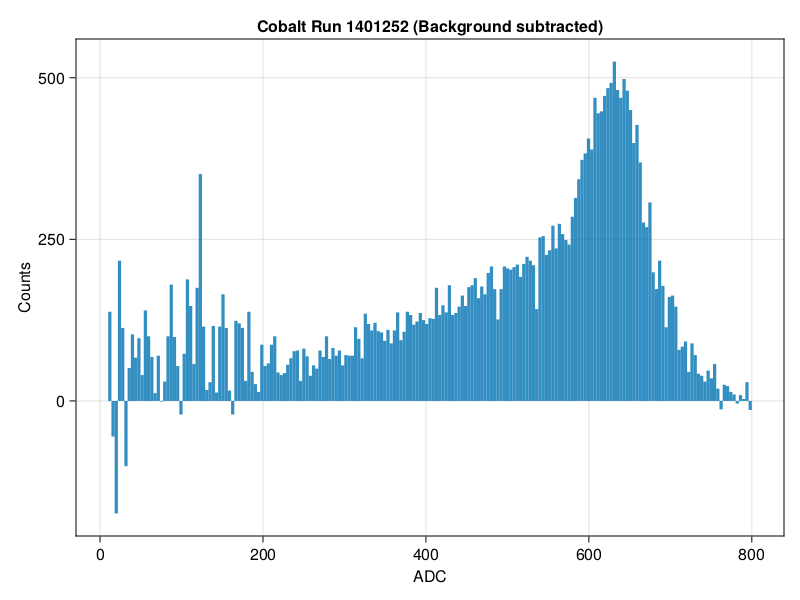

In [71]:
f = datadir("exp_pro", "Cobalt_1401252.root")
rf = ROOTFile(f)
t = LazyTree(rf, "SimOut", ["adc1", "adc3", "timestamp", "runno"])

run = t.runno[1]
timestamp = t.timestamp[1]

bkg_fl = readdir(datadir("exp_pro"); join=true)
bkg_fl = filter(x -> occursin("Bkg", x), bkg_fl)
bkg_rn = parse.(Int, (map(x -> x.match, match.(r"[0-9]+", bkg_fl))))
Δrun = abs.(bkg_rn .- run)
close_bkg = bkg_fl[argmin(Δrun)]
bkg_f = ROOTFile(close_bkg)
bkgt = LazyTree(bkg_f, "SimOut", ["adc1", "adc3", "timestamp"])

timestamp_bkg = bkgt.timestamp[1]

adc1 = t.adc1 |> collect
replace!(x -> x > 1e6 ? 0.0 : x, adc1) # replace bad samples
adc3 = t.adc3 |> collect
replace!(x -> x > 1e6 ? 0.0 : x, adc3) # replace bad samples
adc_bkg1 = bkgt.adc1 |> collect
replace!(x -> x > 1e6 ? 0.0 : x, adc_bkg1) # replace bad samples
adc_bkg3 = bkgt.adc3 |> collect
replace!(x -> x > 1e6 ? 0.0 : x, adc_bkg3) # replace bad samples

spe = readdlm(datadir("cal_results", "spe.txt"); comments=true)
speco_i = argmin(abs.(spe[:, 1] .- timestamp))
spebkg_i = argmin(abs.(spe[:, 1] .- timestamp_bkg))
speco1, speco3 = spe[speco_i, 2:3]
spebkg1, spebkg3 = spe[spebkg_i, 2:3]

# Run times for scaling
co_time = t.timestamp[end] - t.timestamp[1]
bkg_time = bkgt.timestamp[end] - bkgt.timestamp[1]

bins = range(10, 800, length=200)
npe_co = adc1 ./ speco1 .+ adc3 ./ speco3 |> filter(isfinite)
npe_bkg = adc_bkg1 ./ spebkg1 .+ adc_bkg3 ./ spebkg3 |> filter(isfinite)
co_hist = Hist1D(npe_co, bins)
bkg_hist = Hist1D(npe_bkg, bins)
data = co_hist - bkg_hist * (co_time / bkg_time)
fig = Figure()
ax = Axis(fig[1, 1], title="Cobalt Run $run (Background subtracted)", xlabel="ADC", ylabel="Counts")
hist!(data)
fig

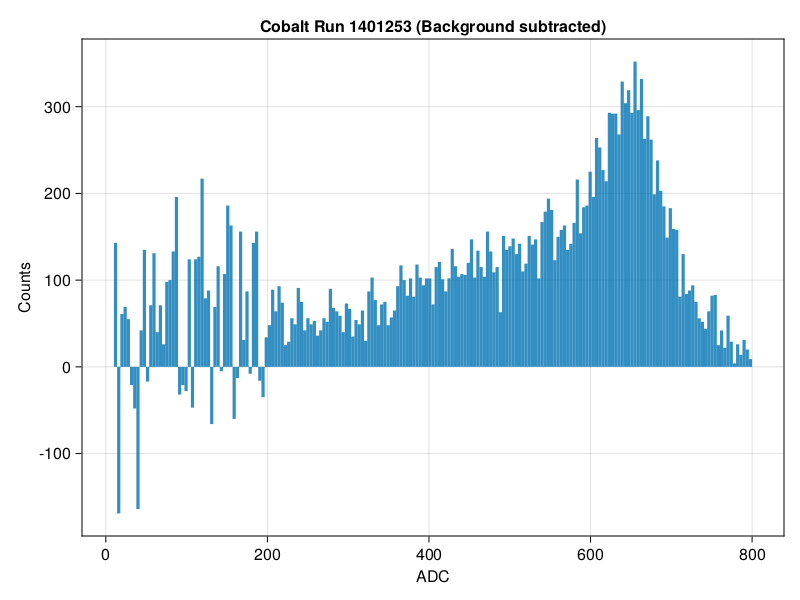

In [72]:
f = datadir("exp_pro", "Cobalt_1401253.root")
rf = ROOTFile(f)
t = LazyTree(rf, "SimOut", ["adc1", "adc3", "timestamp", "runno"])

run = t.runno[1]
timestamp = t.timestamp[1]

bkg_fl = readdir(datadir("exp_pro"); join=true)
bkg_fl = filter(x -> occursin("Bkg", x), bkg_fl)
bkg_rn = parse.(Int, (map(x -> x.match, match.(r"[0-9]+", bkg_fl))))
Δrun = abs.(bkg_rn .- run)
close_bkg = bkg_fl[argmin(Δrun)]
bkg_f = ROOTFile(close_bkg)
bkgt = LazyTree(bkg_f, "SimOut", ["adc1", "adc3", "timestamp"])

timestamp_bkg = bkgt.timestamp[1]

adc1 = t.adc1 |> collect
replace!(x -> x > 1e6 ? 0.0 : x, adc1) # replace bad samples
adc3 = t.adc3 |> collect
replace!(x -> x > 1e6 ? 0.0 : x, adc3) # replace bad samples
adc_bkg1 = bkgt.adc1 |> collect
replace!(x -> x > 1e6 ? 0.0 : x, adc_bkg1) # replace bad samples
adc_bkg3 = bkgt.adc3 |> collect
replace!(x -> x > 1e6 ? 0.0 : x, adc_bkg3) # replace bad samples

spe = readdlm(datadir("cal_results", "spe.txt"); comments=true)
speco_i = argmin(abs.(spe[:, 1] .- timestamp))
spebkg_i = argmin(abs.(spe[:, 1] .- timestamp_bkg))
speco1, speco3 = spe[speco_i, 2:3]
spebkg1, spebkg3 = spe[spebkg_i, 2:3]

# Run times for scaling
co_time = t.timestamp[end] - t.timestamp[1]
bkg_time = bkgt.timestamp[end] - bkgt.timestamp[1]

bins = range(10, 800, length=200)
npe_co = adc1 ./ speco1 .+ adc3 ./ speco3 |> filter(isfinite)
npe_bkg = adc_bkg1 ./ spebkg1 .+ adc_bkg3 ./ spebkg3 |> filter(isfinite)
co_hist = Hist1D(npe_co, bins)
bkg_hist = Hist1D(npe_bkg, bins)
data = co_hist - bkg_hist * (co_time / bkg_time)
fig = Figure()
ax = Axis(fig[1, 1], title="Cobalt Run $run (Background subtracted)", xlabel="ADC", ylabel="Counts")
hist!(data)
fig

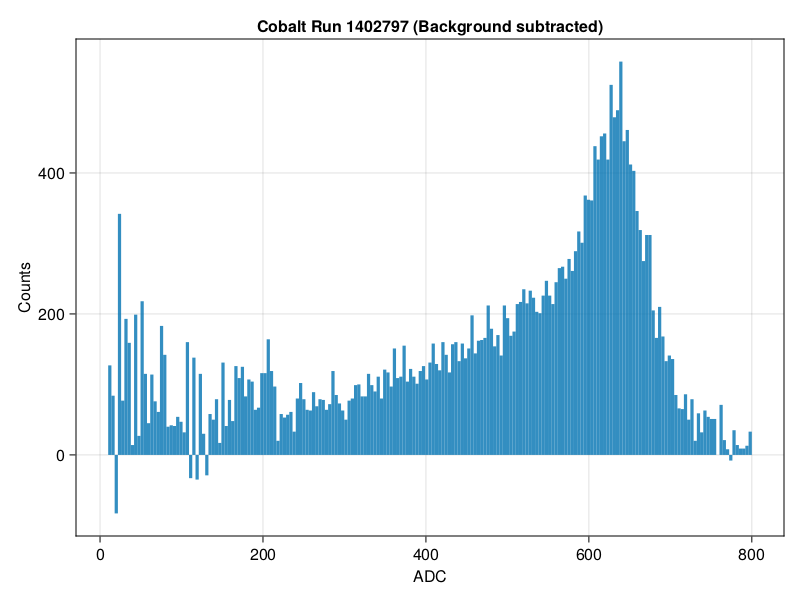

In [73]:
f = datadir("exp_pro", "Cobalt_1402797.root")
rf = ROOTFile(f)
t = LazyTree(rf, "SimOut", ["adc1", "adc3", "timestamp", "runno"])

run = t.runno[1]
timestamp = t.timestamp[1]

bkg_fl = readdir(datadir("exp_pro"); join=true)
bkg_fl = filter(x -> occursin("Bkg", x), bkg_fl)
bkg_rn = parse.(Int, (map(x -> x.match, match.(r"[0-9]+", bkg_fl))))
Δrun = abs.(bkg_rn .- run)
close_bkg = bkg_fl[argmin(Δrun)]
bkg_f = ROOTFile(close_bkg)
bkgt = LazyTree(bkg_f, "SimOut", ["adc1", "adc3", "timestamp"])

timestamp_bkg = bkgt.timestamp[1]

adc1 = t.adc1 |> collect
replace!(x -> x > 1e6 ? 0.0 : x, adc1) # replace bad samples
adc3 = t.adc3 |> collect
replace!(x -> x > 1e6 ? 0.0 : x, adc3) # replace bad samples
adc_bkg1 = bkgt.adc1 |> collect
replace!(x -> x > 1e6 ? 0.0 : x, adc_bkg1) # replace bad samples
adc_bkg3 = bkgt.adc3 |> collect
replace!(x -> x > 1e6 ? 0.0 : x, adc_bkg3) # replace bad samples

spe = readdlm(datadir("cal_results", "spe.txt"); comments=true)
speco_i = argmin(abs.(spe[:, 1] .- timestamp))
spebkg_i = argmin(abs.(spe[:, 1] .- timestamp_bkg))
speco1, speco3 = spe[speco_i, 2:3]
spebkg1, spebkg3 = spe[spebkg_i, 2:3]

# Run times for scaling
co_time = t.timestamp[end] - t.timestamp[1]
bkg_time = bkgt.timestamp[end] - bkgt.timestamp[1]

bins = range(10, 800, length=200)
npe_co = adc1 ./ speco1 .+ adc3 ./ speco3 |> filter(isfinite)
npe_bkg = adc_bkg1 ./ spebkg1 .+ adc_bkg3 ./ spebkg3 |> filter(isfinite)
co_hist = Hist1D(npe_co, bins)
bkg_hist = Hist1D(npe_bkg, bins)
data = co_hist - bkg_hist * (co_time / bkg_time)
fig = Figure()
ax = Axis(fig[1, 1], title="Cobalt Run $run (Background subtracted)", xlabel="ADC", ylabel="Counts")
hist!(data)
fig

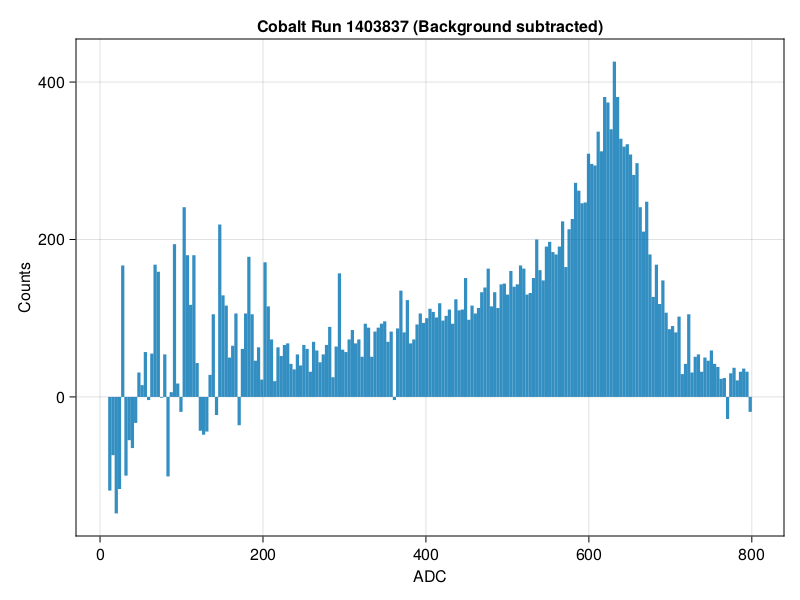

In [74]:
f = datadir("exp_pro", "Cobalt_1403837.root")
rf = ROOTFile(f)
t = LazyTree(rf, "SimOut", ["adc1", "adc3", "timestamp", "runno"])

run = t.runno[1]
timestamp = t.timestamp[1]

bkg_fl = readdir(datadir("exp_pro"); join=true)
bkg_fl = filter(x -> occursin("Bkg", x), bkg_fl)
bkg_rn = parse.(Int, (map(x -> x.match, match.(r"[0-9]+", bkg_fl))))
Δrun = abs.(bkg_rn .- run)
close_bkg = bkg_fl[argmin(Δrun)]
bkg_f = ROOTFile(close_bkg)
bkgt = LazyTree(bkg_f, "SimOut", ["adc1", "adc3", "timestamp"])

timestamp_bkg = bkgt.timestamp[1]

adc1 = t.adc1 |> collect
replace!(x -> x > 1e6 ? 0.0 : x, adc1) # replace bad samples
adc3 = t.adc3 |> collect
replace!(x -> x > 1e6 ? 0.0 : x, adc3) # replace bad samples
adc_bkg1 = bkgt.adc1 |> collect
replace!(x -> x > 1e6 ? 0.0 : x, adc_bkg1) # replace bad samples
adc_bkg3 = bkgt.adc3 |> collect
replace!(x -> x > 1e6 ? 0.0 : x, adc_bkg3) # replace bad samples

spe = readdlm(datadir("cal_results", "spe.txt"); comments=true)
speco_i = argmin(abs.(spe[:, 1] .- timestamp))
spebkg_i = argmin(abs.(spe[:, 1] .- timestamp_bkg))
speco1, speco3 = spe[speco_i, 2:3]
spebkg1, spebkg3 = spe[spebkg_i, 2:3]

# Run times for scaling
co_time = t.timestamp[end] - t.timestamp[1]
bkg_time = bkgt.timestamp[end] - bkgt.timestamp[1]

bins = range(10, 800, length=200)
npe_co = adc1 ./ speco1 .+ adc3 ./ speco3 |> filter(isfinite)
npe_bkg = adc_bkg1 ./ spebkg1 .+ adc_bkg3 ./ spebkg3 |> filter(isfinite)
co_hist = Hist1D(npe_co, bins)
bkg_hist = Hist1D(npe_bkg, bins)
data = co_hist - bkg_hist * (co_time / bkg_time)
fig = Figure()
ax = Axis(fig[1, 1], title="Cobalt Run $run (Background subtracted)", xlabel="ADC", ylabel="Counts")
hist!(data)
fig

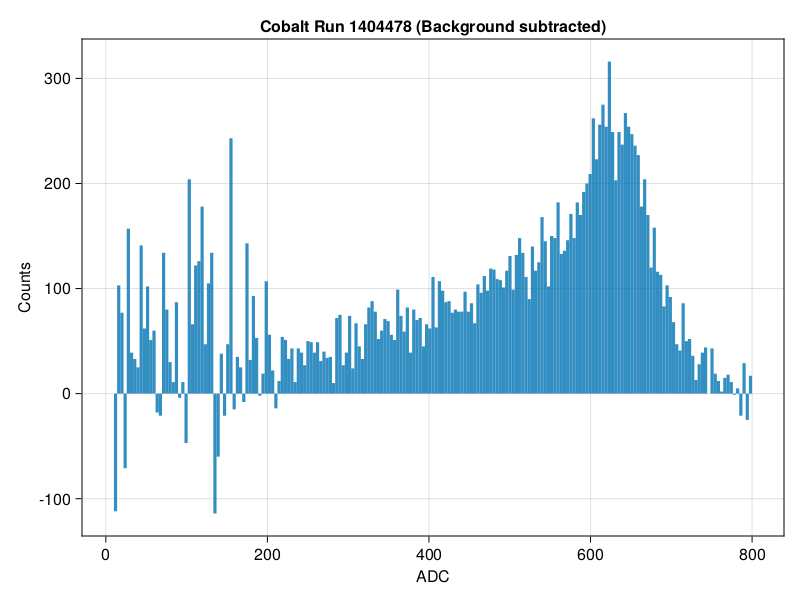

In [75]:
f = datadir("exp_pro", "Cobalt_1404478.root")
rf = ROOTFile(f)
t = LazyTree(rf, "SimOut", ["adc1", "adc3", "timestamp", "runno"])

run = t.runno[1]
timestamp = t.timestamp[1]

bkg_fl = readdir(datadir("exp_pro"); join=true)
bkg_fl = filter(x -> occursin("Bkg", x), bkg_fl)
bkg_rn = parse.(Int, (map(x -> x.match, match.(r"[0-9]+", bkg_fl))))
Δrun = abs.(bkg_rn .- run)
close_bkg = bkg_fl[argmin(Δrun)]
bkg_f = ROOTFile(close_bkg)
bkgt = LazyTree(bkg_f, "SimOut", ["adc1", "adc3", "timestamp"])

timestamp_bkg = bkgt.timestamp[1]

adc1 = t.adc1 |> collect
replace!(x -> x > 1e6 ? 0.0 : x, adc1) # replace bad samples
adc3 = t.adc3 |> collect
replace!(x -> x > 1e6 ? 0.0 : x, adc3) # replace bad samples
adc_bkg1 = bkgt.adc1 |> collect
replace!(x -> x > 1e6 ? 0.0 : x, adc_bkg1) # replace bad samples
adc_bkg3 = bkgt.adc3 |> collect
replace!(x -> x > 1e6 ? 0.0 : x, adc_bkg3) # replace bad samples

spe = readdlm(datadir("cal_results", "spe.txt"); comments=true)
speco_i = argmin(abs.(spe[:, 1] .- timestamp))
spebkg_i = argmin(abs.(spe[:, 1] .- timestamp_bkg))
speco1, speco3 = spe[speco_i, 2:3]
spebkg1, spebkg3 = spe[spebkg_i, 2:3]

# Run times for scaling
co_time = t.timestamp[end] - t.timestamp[1]
bkg_time = bkgt.timestamp[end] - bkgt.timestamp[1]

bins = range(10, 800, length=200)
npe_co = adc1 ./ speco1 .+ adc3 ./ speco3 |> filter(isfinite)
npe_bkg = adc_bkg1 ./ spebkg1 .+ adc_bkg3 ./ spebkg3 |> filter(isfinite)
co_hist = Hist1D(npe_co, bins)
bkg_hist = Hist1D(npe_bkg, bins)
data = co_hist - bkg_hist * (co_time / bkg_time)
fig = Figure()
ax = Axis(fig[1, 1], title="Cobalt Run $run (Background subtracted)", xlabel="ADC", ylabel="Counts")
hist!(data)
fig

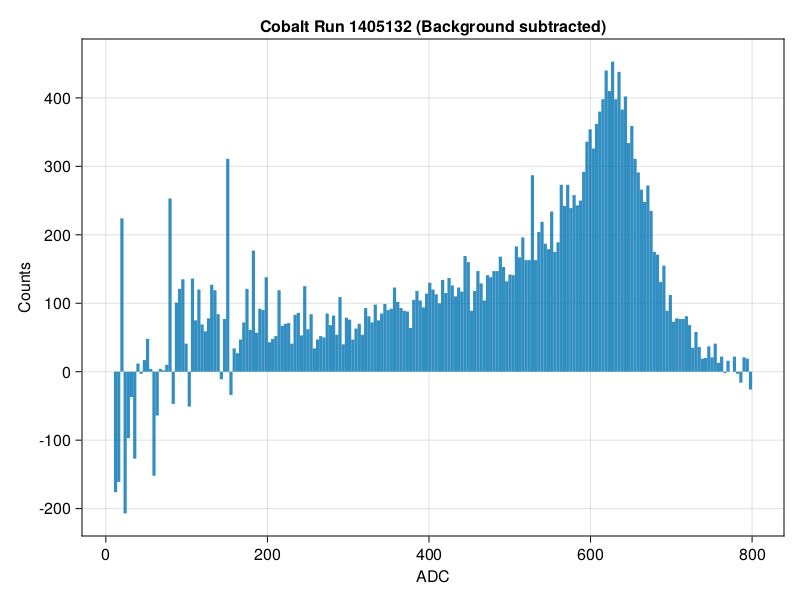

In [76]:
f = datadir("exp_pro", "Cobalt_1405132.root")
rf = ROOTFile(f)
t = LazyTree(rf, "SimOut", ["adc1", "adc3", "timestamp", "runno"])

run = t.runno[1]
timestamp = t.timestamp[1]

bkg_fl = readdir(datadir("exp_pro"); join=true)
bkg_fl = filter(x -> occursin("Bkg", x), bkg_fl)
bkg_rn = parse.(Int, (map(x -> x.match, match.(r"[0-9]+", bkg_fl))))
Δrun = abs.(bkg_rn .- run)
close_bkg = bkg_fl[argmin(Δrun)]
bkg_f = ROOTFile(close_bkg)
bkgt = LazyTree(bkg_f, "SimOut", ["adc1", "adc3", "timestamp"])

timestamp_bkg = bkgt.timestamp[1]

adc1 = t.adc1 |> collect
replace!(x -> x > 1e6 ? 0.0 : x, adc1) # replace bad samples
adc3 = t.adc3 |> collect
replace!(x -> x > 1e6 ? 0.0 : x, adc3) # replace bad samples
adc_bkg1 = bkgt.adc1 |> collect
replace!(x -> x > 1e6 ? 0.0 : x, adc_bkg1) # replace bad samples
adc_bkg3 = bkgt.adc3 |> collect
replace!(x -> x > 1e6 ? 0.0 : x, adc_bkg3) # replace bad samples

spe = readdlm(datadir("cal_results", "spe.txt"); comments=true)
speco_i = argmin(abs.(spe[:, 1] .- timestamp))
spebkg_i = argmin(abs.(spe[:, 1] .- timestamp_bkg))
speco1, speco3 = spe[speco_i, 2:3]
spebkg1, spebkg3 = spe[spebkg_i, 2:3]

# Run times for scaling
co_time = t.timestamp[end] - t.timestamp[1]
bkg_time = bkgt.timestamp[end] - bkgt.timestamp[1]

bins = range(10, 800, length=200)
npe_co = adc1 ./ speco1 .+ adc3 ./ speco3 |> filter(isfinite)
npe_bkg = adc_bkg1 ./ spebkg1 .+ adc_bkg3 ./ spebkg3 |> filter(isfinite)
co_hist = Hist1D(npe_co, bins)
bkg_hist = Hist1D(npe_bkg, bins)
data = co_hist - bkg_hist * (co_time / bkg_time)
fig = Figure()
ax = Axis(fig[1, 1], title="Cobalt Run $run (Background subtracted)", xlabel="ADC", ylabel="Counts")
hist!(data)
fig

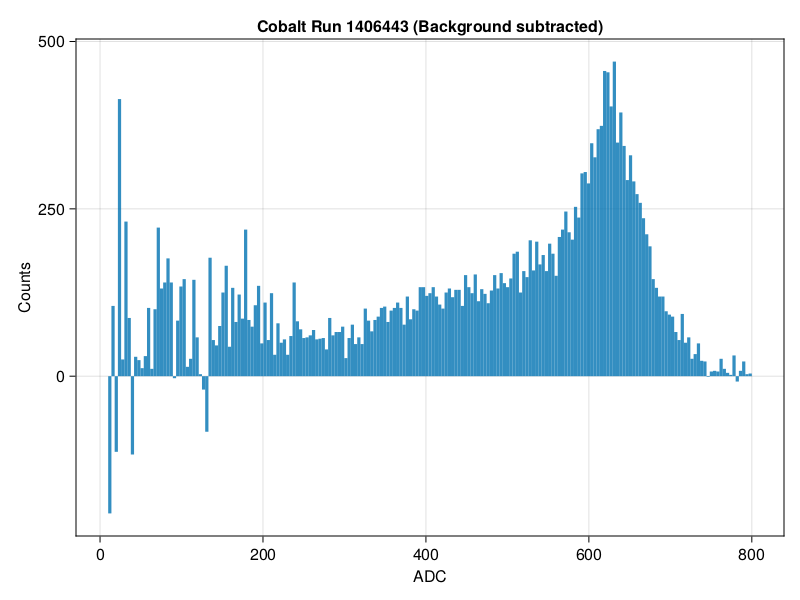

In [77]:
f = datadir("exp_pro", "Cobalt_1406443.root")
rf = ROOTFile(f)
t = LazyTree(rf, "SimOut", ["adc1", "adc3", "timestamp", "runno"])

run = t.runno[1]
timestamp = t.timestamp[1]

bkg_fl = readdir(datadir("exp_pro"); join=true)
bkg_fl = filter(x -> occursin("Bkg", x), bkg_fl)
bkg_rn = parse.(Int, (map(x -> x.match, match.(r"[0-9]+", bkg_fl))))
Δrun = abs.(bkg_rn .- run)
close_bkg = bkg_fl[argmin(Δrun)]
bkg_f = ROOTFile(close_bkg)
bkgt = LazyTree(bkg_f, "SimOut", ["adc1", "adc3", "timestamp"])

timestamp_bkg = bkgt.timestamp[1]

adc1 = t.adc1 |> collect
replace!(x -> x > 1e6 ? 0.0 : x, adc1) # replace bad samples
adc3 = t.adc3 |> collect
replace!(x -> x > 1e6 ? 0.0 : x, adc3) # replace bad samples
adc_bkg1 = bkgt.adc1 |> collect
replace!(x -> x > 1e6 ? 0.0 : x, adc_bkg1) # replace bad samples
adc_bkg3 = bkgt.adc3 |> collect
replace!(x -> x > 1e6 ? 0.0 : x, adc_bkg3) # replace bad samples

spe = readdlm(datadir("cal_results", "spe.txt"); comments=true)
speco_i = argmin(abs.(spe[:, 1] .- timestamp))
spebkg_i = argmin(abs.(spe[:, 1] .- timestamp_bkg))
speco1, speco3 = spe[speco_i, 2:3]
spebkg1, spebkg3 = spe[spebkg_i, 2:3]

# Run times for scaling
co_time = t.timestamp[end] - t.timestamp[1]
bkg_time = bkgt.timestamp[end] - bkgt.timestamp[1]

bins = range(10, 800, length=200)
npe_co = adc1 ./ speco1 .+ adc3 ./ speco3 |> filter(isfinite)
npe_bkg = adc_bkg1 ./ spebkg1 .+ adc_bkg3 ./ spebkg3 |> filter(isfinite)
co_hist = Hist1D(npe_co, bins)
bkg_hist = Hist1D(npe_bkg, bins)
data = co_hist - bkg_hist * (co_time / bkg_time)
fig = Figure()
ax = Axis(fig[1, 1], title="Cobalt Run $run (Background subtracted)", xlabel="ADC", ylabel="Counts")
hist!(data)
fig

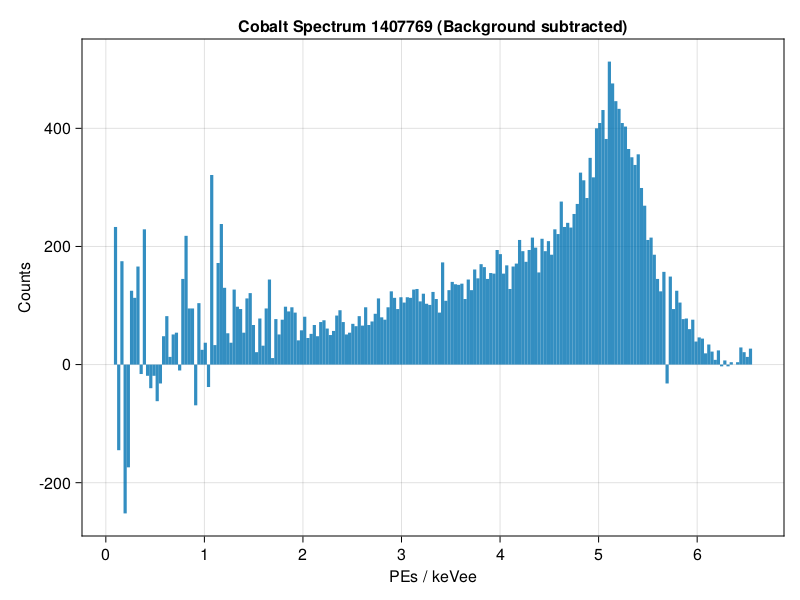

In [5]:
f = datadir("exp_pro", "Cobalt_1407769.root")
rf = ROOTFile(f)
t = LazyTree(rf, "SimOut", ["adc1", "adc3", "timestamp", "runno"])

run = t.runno[1]
timestamp = t.timestamp[1]

bkg_fl = readdir(datadir("exp_pro"); join=true)
bkg_fl = filter(x -> occursin("Bkg", x), bkg_fl)
bkg_rn = parse.(Int, (map(x -> x.match, match.(r"[0-9]+", bkg_fl))))
Δrun = abs.(bkg_rn .- run)
close_bkg = bkg_fl[argmin(Δrun)]
bkg_f = ROOTFile(close_bkg)
bkgt = LazyTree(bkg_f, "SimOut", ["adc1", "adc3", "timestamp"])

timestamp_bkg = bkgt.timestamp[1]

adc1 = t.adc1 |> collect
replace!(x -> x > 1e6 ? 0.0 : x, adc1) # replace bad samples
adc3 = t.adc3 |> collect
replace!(x -> x > 1e6 ? 0.0 : x, adc3) # replace bad samples
adc_bkg1 = bkgt.adc1 |> collect
replace!(x -> x > 1e6 ? 0.0 : x, adc_bkg1) # replace bad samples
adc_bkg3 = bkgt.adc3 |> collect
replace!(x -> x > 1e6 ? 0.0 : x, adc_bkg3) # replace bad samples

spe = readdlm(datadir("cal_results", "spe.txt"); comments=true)
speco_i = argmin(abs.(spe[:, 1] .- timestamp))
spebkg_i = argmin(abs.(spe[:, 1] .- timestamp_bkg))
speco1, speco3 = spe[speco_i, 2:3]
spebkg1, spebkg3 = spe[spebkg_i, 2:3]

# Run times for scaling
co_time = t.timestamp[end] - t.timestamp[1]
bkg_time = bkgt.timestamp[end] - bkgt.timestamp[1]

bins = range(10, 800, length=200) ./ co_energy
npe_co = (adc1 ./ speco1 .+ adc3 ./ speco3 |> filter(isfinite)) ./ co_energy
npe_bkg = (adc_bkg1 ./ spebkg1 .+ adc_bkg3 ./ spebkg3 |> filter(isfinite)) ./ co_energy
co_hist = Hist1D(npe_co, bins)
bkg_hist = Hist1D(npe_bkg, bins)
data = co_hist - bkg_hist * (co_time / bkg_time)
fig = Figure()
ax = Axis(fig[1, 1], title="Cobalt Spectrum $run (Background subtracted)", xlabel="PEs / keVee", ylabel="Counts")
hist!(data)
fig

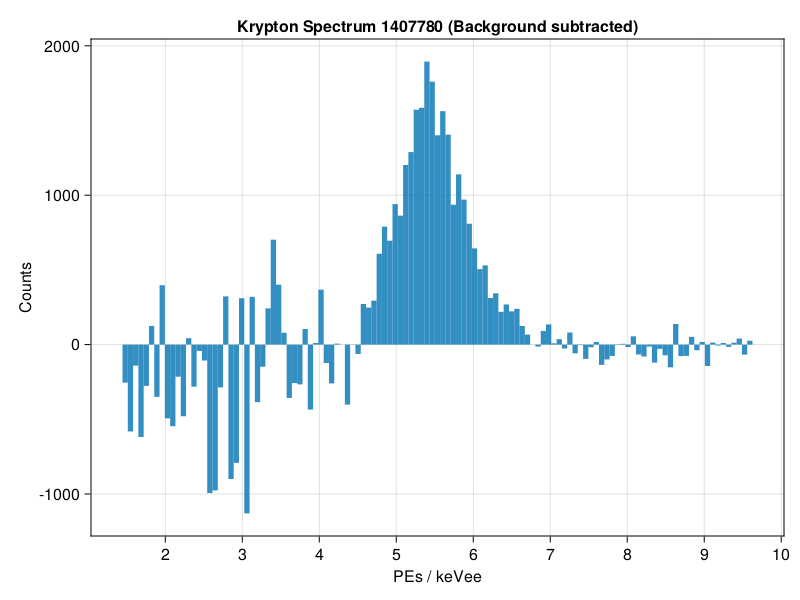

In [7]:
f = datadir("exp_pro", "Krypton_1407.root")
rf = ROOTFile(f)
t = LazyTree(rf, "SimOut", ["adc1", "adc3", "timestamp", "runno"])

run = t.runno[1]
timestamp = t.timestamp[1]

bkg_fl = readdir(datadir("exp_pro"); join=true)
bkg_fl = filter(x -> occursin("Bkg", x), bkg_fl)
bkg_rn = parse.(Int, (map(x -> x.match, match.(r"[0-9]+", bkg_fl))))
Δrun = abs.(bkg_rn .- run)
close_bkg = bkg_fl[argmin(Δrun)]
bkg_f = ROOTFile(close_bkg)
bkgt = LazyTree(bkg_f, "SimOut", ["adc1", "adc3", "timestamp"])

timestamp_bkg = bkgt.timestamp[1]

adc1 = t.adc1 |> collect
replace!(x -> x > 1e6 ? 0.0 : x, adc1) # replace bad samples
adc3 = t.adc3 |> collect
replace!(x -> x > 1e6 ? 0.0 : x, adc3) # replace bad samples
adc_bkg1 = bkgt.adc1 |> collect
replace!(x -> x > 1e6 ? 0.0 : x, adc_bkg1) # replace bad samples
adc_bkg3 = bkgt.adc3 |> collect
replace!(x -> x > 1e6 ? 0.0 : x, adc_bkg3) # replace bad samples

spe = readdlm(datadir("cal_results", "spe.txt"); comments=true)
speco_i = argmin(abs.(spe[:, 1] .- timestamp))
spebkg_i = argmin(abs.(spe[:, 1] .- timestamp_bkg))
speco1, speco3 = spe[speco_i, 2:3]
spebkg1, spebkg3 = spe[spebkg_i, 2:3]

# Run times for scaling
co_time = t.timestamp[end] - t.timestamp[1]
bkg_time = bkgt.timestamp[end] - bkgt.timestamp[1]

bins = range(60, 400, length=120) ./ kr_energy
npe_co = (adc1 ./ speco1 .+ adc3 ./ speco3 |> filter(isfinite)) ./ kr_energy
npe_bkg = (adc_bkg1 ./ spebkg1 .+ adc_bkg3 ./ spebkg3 |> filter(isfinite)) ./ kr_energy
co_hist = Hist1D(npe_co, bins)
bkg_hist = Hist1D(npe_bkg, bins)
data = co_hist - bkg_hist * (co_time / bkg_time)
fig = Figure()
ax = Axis(fig[1, 1], title="Krypton Spectrum $run (Background subtracted)", xlabel="PEs / keVee", ylabel="Counts",
  xticks=1:10)
hist!(data)
fig

# Krypton Analysis

In [12]:
function psd(run)
  f = datadir("exp_pro", "Krypton_$run.root")
  rf = ROOTFile(f)
  t = LazyTree(rf, "SimOut", ["adc1", "adc3", "f90", "timestamp", "runno", "light_fraction"])
  ts = t.timestamp[1]
  spe_i = argmin(abs.(spe[:, 1] .- ts))
  pes_keVee_i = argmin(abs.(pes_keVee[:, 2] .- ts))

  enes = zeros(length(t))
  for (i, event) in enumerate(t)
    npe = event.adc1[1] / spe[spe_i, 2] + event.adc3[1] / spe[spe_i, 3]
    ene = npe / pes_keVee[pes_keVee_i, 3]
    enes[i] = ene
  end
  idx = findall(x -> (x < 1e6 && !isnan(x)), enes)
  enes = enes[idx]
  # f90s = t.f90[idx]
  top_fracs = t.light_fraction[idx]
  # idx = findall(!isnan, f90s)
  idx = findall(!isnan, top_fracs)
  h = Hist3D((enes[idx], top_fracs[idx], t.f90[idx]), (range(0, 50, length=100), range(0, 1, length=100)))
  fig = Figure()
  ax = Axis(fig[1, 1], title="Krypton Run $run",
    xlabel="Reconstructed energy [keVee]", ylabel="Top fraction", yticks=0:0.1:1)
  hm = heatmap!(ax, h)
  Colorbar(fig[1, 2], hm)
  # save(plotsdir("psd_$(t.runno[1]).pdf"), fig)
  fig
end

psd (generic function with 1 method)

In [15]:
save(plotsdir("energy_topfrac.png"), psd(1407))

CairoMakie.Screen{IMAGE}
